In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
class PrincipalComponentAnalysis:
    
    def __init__(self, n_components = 2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        covariance_matrix = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
        eigen_vectors = eigen_vectors.T
        sorted_idx = np.argsort(eigen_values)[::-1]
        eigen_values = eigen_values[sorted_idx]
        eigen_vectors = eigen_vectors[sorted_idx]
    
        self.components = eigen_vectors[0 : self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)


In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [4]:
pca = PrincipalComponentAnalysis(n_components = 2)
pca.fit(X)
X_transformed = pca.transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=10)

In [9]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

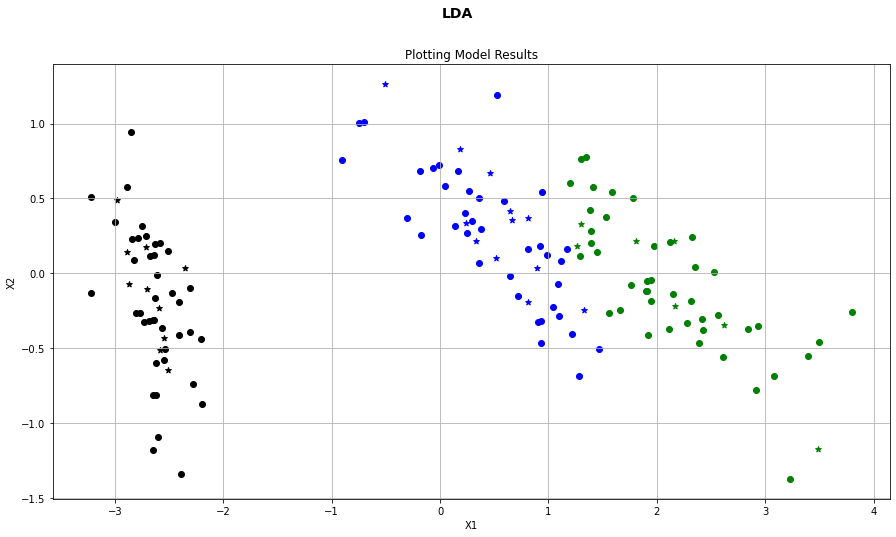

In [10]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("LDA", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred[idx]])
    
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

print("The training accuracy is : ", accuracy_score(y_train, y_train_pred))
print("The testing accuracy is : ", accuracy_score(y_test, y_test_pred))

The training accuracy is :  0.9666666666666667
The testing accuracy is :  0.9666666666666667
